<a href="https://colab.research.google.com/github/AlexLef169/DMML2021_OMEGA/blob/main/UNIL_OMEGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining and Machine Learning - Project

## Detecting Difficulty Level of French Texts

### Step by step guidelines

The following are a set of step by step guidelines to help you get started with your project for the Data Mining and Machine Learning class. 

#### 1. 📂 Create a public GitHub repository for your team using this naming convention `DMML2021_[your_team_name]` with the following structure:
- data (subfolder) 
- code (subfolder) 
- documentation (subfolder)
- a readme file (.md): *mention team name, participants, brief description of the project, approach and summary of results table.*

All team members should contribute to the GitHub repository.

#### 2. 🇰 Join the competititon on Kaggle using an invitation link like this one: https://www.kaggle.com/t/69884669004b482c96dd59e5d0c52044 

Under the Team tab, save your team name (`UNIL_your_team_name`) and make sure your team members join in as well. You can merge your user account with your teammates in order to create a team.

#### 3. 📓 Read the data into your colab notebook. There should be one code notebook per team, but all team members can participate and contribute code. 

You can use either direct the Kaggle API and your Kaggle credentials (as explained below and **entirely optional**), or dowload the data form Kaggle and upload it onto your team's GitHub repository under the data subfolder.

#### 4. 💎 Train your models and upload the code under your team's GitHub repo. Set the `random_state=0`.
- baseline
- logistic regression with TFidf vectoriser (simple, no data cleaning)
- KNN & hyperparameter optimisation (simple, no data cleaning)
- Decision Tree classifier & hyperparameter optimisation (simple, no data cleaning)
- Random Forests classifier (simple, no data cleaning)
- another technique or combination of techniques of your choice

#### 5. 🎥 Create a YouTube video (10-15 minutes) of your solution and embed it in your notebook. Explain the algorithms used and the evaluation of your solutions. All projects will also be presented live by the group during the last class.

DONE

### Submission details (one per team)
1. Add the link to your team's GitHub repository here: https://moodle.unil.ch/mod/url/view.php?id=841193

2. Download a ZIPped file of your team's repositiory and submit it in Moodle here: https://moodle.unil.ch/mod/assign/view.php?id=1194395

3. Post a link to your video in Slack under the project channel.

### Grading (one per team)
- 5 points presentation
- 5 points video 
- 10 points notebook quality 
- 10 points your solution

## Some further details for points 3 and 4 above.

### 3. Read data into your notebook with the Kaggle API (entirely optional). 

You can also download the data from Kaggle and put it in your team's repo the data folder.

In [ ]:
# reading in the data via the Kaggle API: optional

# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [12]:
# install Kaggle
! pip install kaggle

Log into your Kaggle account, go to Account > API > Create new API token. You will obtain a kaggle.json file, which you save on your Google Drive directy in my drive.

In [13]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [14]:
#read in your Kaggle credentials from Google Drive
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json


In [ ]:
# download the dataset from the competition page
! kaggle competitions download -c detecting-the-difficulty-level-of-french-texts

In [44]:
# read in your training data
import pandas as pd
import numpy as np

df = pd.read_csv('/content/training_data.csv')

In [ ]:
df.head()

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1


In [ ]:
df.shape

(4800, 3)

Have a look at the data on which to make predictions.

In [ ]:
df_pred = pd.read_csv('/content/unlabelled_test_data.csv')
df_pred.head()

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."


And this is the format for your submissions.

In [ ]:
df_example_submission = pd.read_csv('/content/sample_submission.csv')
df_example_submission.head()

,id,difficulty
0,0,A1
1,1,A1
2,2,A1
3,3,A1
4,4,A1


### 4. Train your models

Set your X and y variables. 
Set the `random_state=0`
Split the data into a train and test set using the following parameters `train_test_split(X, y, test_size=0.2, random_state=0)`.

#### 4.1.Baseline
What is the baseline for this classification problem? (you can use the highest label frequency from the entire training data, the df above)

In [17]:
np.random.seed = 0
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn. preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline

In [18]:
#My baseline
df.difficulty.value_counts()

round(df.difficulty.value_counts()[0] / len(df), 4)

0.1694

#### 4.2. Logistic Regression (without data cleaning)

Train a simple logistic regression model using a Tfidf vectoriser.

In [ ]:
X = df['sentence']
y = df["difficulty"]
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

tfidf = TfidfVectorizer()
classifier = LogisticRegression(C=2, penalty='l2')

pipe = Pipeline([('vectorizer', tfidf),
                 ('classifier', classifier)])

# Fit model on training set
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

Calculate accuracy, precision, recall and F1 score on the test set.

In [20]:
# Evaluate the model
def evaluate(true, pred):
    precision = precision_score(true, pred,average='weighted')
    recall = recall_score(true, pred,average='weighted')
    f1 = f1_score(true, pred,average='weighted') # on peut remplacer par micro, macro
    print(f"CONFUSION MATRIX:\n{confusion_matrix(true, pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(true, pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}")

evaluate(y_test, y_pred)

CONFUSION MATRIX:
[[91 35 19 10  4  2]
 [51 64 32  4  5  8]
 [12 37 70 14  7 20]
 [ 6  5 18 68 24 23]
 [ 3  4 14 41 67 44]
 [ 7  8  9 15 22 97]]
ACCURACY SCORE:
0.4760
CLASSIFICATION REPORT:
	Precision: 0.4762
	Recall: 0.4760
	F1_Score: 0.4732


Have a look at the confusion matrix and identify a few examples of sentences that are not well classified.

In [21]:
nwc = []
X_test2 = np.array(X_test)
y_test2 = np.array(y_test)
y_pred2 = np.array(y_pred)
for i in range(0, len(y_test2)) : 
  if y_pred2[i] != y_test2[i] :
    nwc.append([i,X_test2[i], y_pred2[i], y_test2[i]])

nwc[:5]

[[0,
  "C'est en décembre 1967, après bien des invectives au Parlement, que sa loi relative à la régulation des naissances, dite loi Neuwirth est votée : elle autorise la vente exclusive des contraceptifs en pharmacie sur ordonnance médicale, avec autorisation parentale pour les mineures",
  'C2',
  'C1'],
 [1,
  'Giscard va pourtant réussir à transformer ce revers en tremplin',
  'B2',
  'C1'],
 [2,
  "Un choix difficile mais important : le public français écoute souvent les professionnels de Cannes pour choisir le film qu'il va aller voir au cinéma.",
  'B1',
  'A2'],
 [3, "Le débat porte plutôt sur l'utilité d'une telle mesure.", 'C1', 'B1'],
 [7,
  "Vous eussiez juré que les gens la voyaient, l'entendaient rouler pesamment devant eux, retentissante de tous les trésors enfermés dans ses flancs.",
  'C2',
  'C1']]

Generate your first predictions on the `unlabelled_test_data.csv`. make sure your predictions match the format of the `unlabelled_test_data.csv`.

#### 4.3. KNN (without data cleaning)

Train a KNN classification model using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [32]:
from sklearn.neighbors import KNeighborsClassifier
# Define classifier
knn_classifier = KNeighborsClassifier()

# Create pipeline
knn_pipe = Pipeline([('vectorizer', tfidf),
                 ('classifier', knn_classifier)])

# Fit model on training set
knn_pipe.fit(X_train, y_train)

# Predictions
y_pred = knn_pipe.predict(X_test)

# Evaluation - test set
evaluate(y_test, y_pred)

CONFUSION MATRIX:
[[287  86  35   5   8   1]
 [181 143  43   7   8   4]
 [145 106  91  27  13  21]
 [ 67  48  57  96  54  71]
 [ 34  22  33  80 129 100]
 [ 29  31  35  43  68 192]]
ACCURACY SCORE:
0.3908
CLASSIFICATION REPORT:
	Precision: 0.3918
	Recall: 0.3908
	F1_Score: 0.3788


Try to improve it by tuning the hyper parameters (`n_neighbors`,   `p`, `weights`).

In [33]:
knn_classifier_2 = KNeighborsClassifier(n_neighbors =2, weights = 'distance', p=2)

knn_pipe = Pipeline([('vectorizer', tfidf),
                 ('classifier', knn_classifier_2)])

# Fit model on training set
knn_pipe.fit(X_train, y_train)

# Predictions
y_pred = knn_pipe.predict(X_test)

# Evaluation - test set
evaluate(y_test, y_pred)

CONFUSION MATRIX:
[[248 108  44   7   9   6]
 [140 135  77  20   8   6]
 [113 103 109  40  21  17]
 [ 48  52  59 110  52  72]
 [ 33  29  44  68 130  94]
 [ 25  33  36  50  66 188]]
ACCURACY SCORE:
0.3833
CLASSIFICATION REPORT:
	Precision: 0.3865
	Recall: 0.3833
	F1_Score: 0.3787


#### 4.4. Decision Tree Classifier (without data cleaning)

Train a Decison Tree classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree_classifier = DecisionTreeClassifier()

tree_pipe = Pipeline([('vectorizer', tfidf),
                 ('classifier', tree_classifier)])

# Fit model on training set
tree_pipe.fit(X_train, y_train)

# Predictions
y_pred = tree_pipe.predict(X_test)

# Evaluation - test set
evaluate(y_test, y_pred)

CONFUSION MATRIX:
[[76 40 28  7  6  4]
 [46 56 33 17  5  7]
 [30 39 38 23 18 12]
 [ 8 17 28 45 25 21]
 [13 20 32 33 42 33]
 [11 16 26 31 35 39]]
ACCURACY SCORE:
0.3083
CLASSIFICATION REPORT:
	Precision: 0.3108
	Recall: 0.3083
	F1_Score: 0.3066


Try to improve it by tuning the hyper parameters (`max_depth`, the depth of the decision tree).

In [ ]:
tree_classifier_2 = DecisionTreeClassifier(max_depth=12)

tree_pipe = Pipeline([('vectorizer', tfidf),
                 ('classifier', tree_classifier_2)])

# Fit model on training set
tree_pipe.fit(X_train, y_train)

# Predictions
y_pred = tree_pipe.predict(X_test)

# Evaluation - test set
evaluate(y_test, y_pred)

CONFUSION MATRIX:
[[97 32  6 18  7  1]
 [72 40 23 19  7  3]
 [44 27 29 37 20  3]
 [15  6 15 69 29 10]
 [16 11 14 73 40 19]
 [24  8 16 57 25 28]]
ACCURACY SCORE:
0.3156
CLASSIFICATION REPORT:
	Precision: 0.3290
	Recall: 0.3156
	F1_Score: 0.2991


#### 4.5. Random Forest Classifier (without data cleaning)

Try a Random Forest Classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc_classifier = RandomForestClassifier()

rfc_pipe = Pipeline([('vectorizer', tfidf),
                 ('classifier', rfc_classifier)])

# Fit model on training set
rfc_pipe.fit(X_train, y_train)

# Predictions
y_pred = rfc_pipe.predict(X_test)

# Evaluation - test set
evaluate(y_test, y_pred)

CONFUSION MATRIX:
[[125  17  12   5   1   1]
 [ 74  57  23   7   2   1]
 [ 32  37  58  19   8   6]
 [ 15  14  15  64  19  17]
 [ 17   8  23  59  43  23]
 [ 21   8  12  36  25  56]]
ACCURACY SCORE:
0.4198
CLASSIFICATION REPORT:
	Precision: 0.4287
	Recall: 0.4198
	F1_Score: 0.4069


#### 4.6. Any other technique, including data cleaning if necessary

Try to improve accuracy by training a better model using the techniques seen in class, or combinations of them.

As usual, show the accuracy, precision, recall and f1 score on the test set.

In [ ]:
!pip install -U spacy

# Download the english language model
!python -m spacy download fr
# Import required packages
import spacy
from spacy import displacy
import string
from spacy.lang.fr.stop_words import STOP_WORDS
from spacy.lang.fr import French

In [24]:
sp = spacy.load('fr_core_news_sm')

Tokenizer function

In [25]:
# Define tokenizer function
def spacy_tokenizer(sentence):

    punctuations = string.punctuation
    stop_words = spacy.lang.fr.stop_words.STOP_WORDS

    # Create token object, which is used to create documents with linguistic annotations.
    mytokens = sp(sentence)

    # Lemmatize each token and convert each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Remove stop words and punctuation
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # Remove anonymous dates and people
    mytokens = [ word.replace('xx/', '').replace('xxxx/', '').replace('xx', '') for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in ["xxxx", "xx", ""] ]

    # Return preprocessed list of tokens
    return mytokens

#**The best algorithm**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


CONFUSION MATRIX:
[[100  34  21   3   3   0]
 [ 47  73  34   6   2   2]
 [ 12  25  87  21   8   7]
 [  0   8   7  68  28  33]
 [  3   2   8  33  76  51]
 [  1   5   8  19  24 101]]
ACCURACY SCORE:
0.5260
CLASSIFICATION REPORT:
	Precision: 0.5264
	Recall: 0.5260
	F1_Score: 0.5240


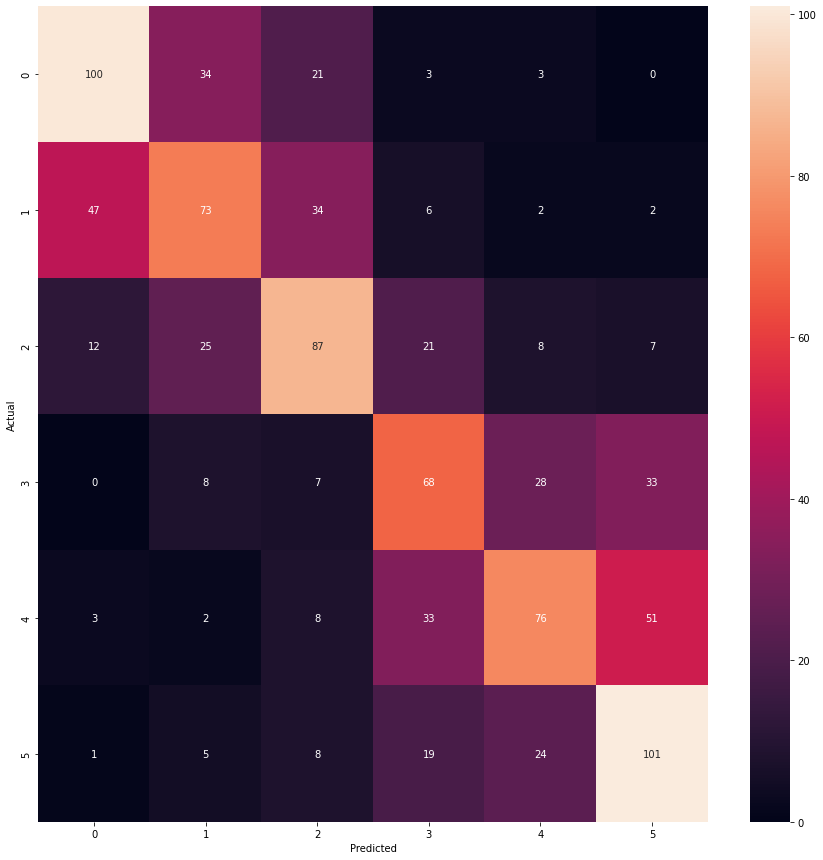

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

tfidf3 = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2', ngram_range=(1, 8), tokenizer=spacy_tokenizer,analyzer="char")

    # Define classifier
classifier = LogisticRegression(solver ='lbfgs', penalty='l2', C=5)

    # Create pipeline
pipe = Pipeline([('vectorizer', tfidf3),
                 ('classifier', classifier)])

    # Fit model on training set
pipe.fit(X_train, y_train)

    # Predictions
y_pred = pipe.predict(X_test)

    # Print accuracy on test set
evaluate(y_test, y_pred)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
## Best estimation ! -> Download Data

df_pred = pd.read_csv('/content/unlabelled_test_data.csv')
x = df_pred["sentence"]
y_predictions = pipe.predict(x)


predi = df_pred
predi["difficulty"] = y_predictions
predicsv = predi[['id','difficulty']]

from google.colab import files
predicsv.to_csv('predicsv.csv') 
files.download('predicsv.csv')

#Examples of other attempts to do better :

Include Gridsearch, standardization, alternative data cleaning 2vec, and PCA...

In [ ]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.linear_model import LogisticRegressionCV
tfidf4 = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2', ngram_range=(1, 8) , tokenizer=spacy_tokenizer,analyzer="char")

#tfidf2 = TfidfVectorizer(ngram_range=(1,8), analyzer="char")
#tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer, ngram_range=(1,8), analyzer="char")

    # Define classifier
classifier = LogisticRegressionCV (Cs =10, cv = 3, solver ='lbfgs', penalty='l2',class_weight = 'balanced')

    # Create pipeline
pipe = Pipeline([('vectorizer', tfidf4),
                 ('classifier', classifier)])



    # Fit model on training set
pipe.fit(X_train, y_train)

    # Predictions
y_pred = pipe.predict(X_test)

    # Print accuracy on test set
evaluate(y_test, y_pred)
print("-----------------------")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


CONFUSION MATRIX:
[[100  35  19   3   2   2]
 [ 45  71  38   6   2   2]
 [ 12  24  87  20  10   7]
 [  1   7  11  66  28  31]
 [  3   2  11  33  77  47]
 [  1   3   9  20  28  97]]
ACCURACY SCORE:
0.5188
CLASSIFICATION REPORT:
	Precision: 0.5189
	Recall: 0.5188
	F1_Score: 0.5170
-----------------------


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier

pipeline = Pipeline([
           ('vect', TfidfVectorizer()),
           ('clf', LogisticRegression())])
parameters = {
'vect__max_df': (0.75, 1.0),
# 'vect__max_features': (None, 5000, 10000, 50000),
'vect__ngram_range': ((1, 2), (1,3),(1,8),(3,7)),  
# 'tfidf__use_idf': (True, False),
'vect__norm': ('l1', 'l2', None),
'clf__solver': ('lbfgs','newton-cg'),
 'clf__C': (10, 100),
 #'clf__class_weight': ('balanced'),
 'clf__max_iter': (100, 500)
}

grid= GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, cv=5,scoring='accuracy')

grid.fit(X_train, y_train)

grid.best_params_

# find best model score
grid.score(X_train, y_train)

print("Total score for %s  is %s  ", grid.best_params_, grid.score(X_train, y_train))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

pipeline = Pipeline([
           ('vect', TfidfVectorizer(tokenizer = spacy_tokenizer, analyzer = "char")),
           ('clf', LogisticRegression(max_iter = 100))])

parameters = {
    # 'vect__max_df': 1.0,
#'vect__tokenizer': (spacy_tokenizer),
# 'vect__max_features': (None, 5000, 10000, 50000),
'vect__ngram_range': ((1,8),(3,7)),  
# 'tfidf__use_idf': (True, False),
'vect__norm': ('l1','l2'),
'clf__solver': ('lbfgs','newton-cg'),
 'clf__C': (10, 100),
 #'clf__class_weight': ('balanced'),
 #'clf__max_iter': (50,100)
}

grid= GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=2, cv=cv,scoring='accuracy')

grid.fit(X_train, y_train)

grid.best_params_

# find best model score
grid.score(X_train, y_train)

print("Total score for %s  is %s  ", grid.best_params_, grid.score(X_train, y_train))

In [ ]:
y_pred =grid.predict(X_test)
evaluate(y_test, y_pred)

In [ ]:
##PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords


# Define cleaning function
def data_cleaner(sms):

    # Define stopwords
    stop_words = stopwords.words('french') #important !

    # Define tokenizer and stemmer
    from nltk.tokenize import word_tokenize
    from nltk.stem import PorterStemmer
    
    # Remove digits
    sms = re.sub(r"\d+","", sms)
    
    # Lowercase
    sms = sms.lower()
    
    # Remove punctuation
    sms = re.sub(r"[^\w\s\d]","", sms)
    
    # Remove stop words
    sms = sms.split()
    sms = " ".join([word for word in sms if not word in stop_words])
    
    # Tokenize
    sms = word_tokenize(sms)
    
    # Stemming
    ps = PorterStemmer()
    sms = [ps.stem(word) for word in sms]
    
    return sms



In [53]:

# Clean X_train as example
X_train.apply(data_cleaner)

from sklearn.feature_extraction.text import TfidfVectorizer

# Define vectorizer - use above cleaning function
tfidf = TfidfVectorizer(sublinear_tf=True, tokenizer=data_cleaner, ngram_range=(1,4), min_df=1, max_df=1.0, analyzer ="char")

# Fit and transform X_train and X_test
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train_vec = tfidf.fit_transform(X_train).toarray()
X_test_vec = tfidf.transform(X_test).toarray()
print(X_train_vec.shape)
X_train_vec


from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import time

# Define Model
pipe = Pipeline([
                 ('logistic reg', LogisticRegression(C=5, solver ='lbfgs', penalty='l2',class_weight = 'balanced'))
                 ])
# Fit model
start = time.time()
pipe.fit(X_train_vec, y_train)
end = time.time()
print('Time: ', round(end-start, 4))
print('Train Accuracy: ', round(pipe.score(X_train_vec, y_train), 4))
print('Test Accuracy: ', round(pipe.score(X_test_vec, y_test), 4))

    # Predictions
y_pred = pipe.predict(X_test_vec)


(3840, 37816)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Time:  113.6817
Train Accuracy:  0.9909
Test Accuracy:  0.5083


In [54]:
# With PCA 
import time
from sklearn.decomposition import PCA

# Define Model
pipe = Pipeline([
                 ('pca', pca),
                 ('logistic reg', LogisticRegression(C=10, solver ='lbfgs', penalty='l2',class_weight = 'balanced')),
                 ])
# Fit model
start = time.time()
pipe.fit(X_train_vec, y_train)
end = time.time()
print('Time: ', round(end-start, 4))
print('Train Accuracy: ', round(pipe.score(X_train_vec, y_train), 4))
print('Test Accuracy: ', round(pipe.score(X_test_vec, y_test), 4))


Time:  14.5961
Train Accuracy:  0.4185
Test Accuracy:  0.3979


Naive Bays method :

In [42]:
##Naive Bays
X = df['sentence']
y = df["difficulty"]
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', TfidfVectorizer(analyzer='word', min_df=1, ngram_range=(1,3))), #tokenizer=spacy_tokenizer, min_df=1, max_df=0.7, analyzer='char'                  
               ('clf', MultinomialNB(alpha=0.05))])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.478125


Method of a re-sampling and a config test :

In [55]:
#Resampling
df_new = pd.concat([df[df["difficulty"] == "A1"].sample(790), df[df["difficulty"] == "A2"].sample(790),df[df["difficulty"] == "B1"].sample(790),df[df["difficulty"] == "B2"].sample(790),
df[df["difficulty"] == "C1"].sample(790),df[df["difficulty"] == "C2"].sample(790)], axis=0).reset_index()
# Select features
X2 = df_new['sentence'] # the features we want to analyze
ylabels = df_new['difficulty'] # the labels, or answers, we want to test against

# Train test split
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X2, ylabels, test_size=0.2, random_state=0, stratify=ylabels)



#1) Improve text preparation
def configs():

    models = list()
    
    # Define config lists
    ngram_range = [(1,1), (1,2), (1,3)]
    min_df = [1]
    max_df = [1.0]
    analyzer=['char','word'] #'word'
    
    # Create config instances
    for n in ngram_range:
        for i in min_df:
            for j in max_df:
              for a in analyzer:
                    cfg = [n, i, j, a]
                    models.append(cfg)
    return models

configs = configs()
configs[:10]


# Define list for result
result = []

for config in configs:

    # Redefine vectorizer
    tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer, 
                                   ngram_range=config[0],
                                   min_df=config[1], max_df=config[2], analyzer=config[3])

    # Define classifier
    classifier = LogisticRegression()

    # Create pipeline
    pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

    # Fit model on training set
    pipe.fit(X_train_b, y_train_b)

    # Predictions
    y_pred = pipe.predict(X_test_b)

    # Print accuracy on test set
    print("CONFIG: ", config)
    evaluate(y_test_b, y_pred)
    print("-----------------------")

    # Append to result
    result.append([config, accuracy_score(y_test_b, y_pred)])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


CONFIG:  [(1, 1), 1, 1.0, 'char']
CONFUSION MATRIX:
[[100  33  11   9   3   2]
 [ 43  60  37   9   1   8]
 [ 17  50  44  23   6  18]
 [  6   5  19  53  37  38]
 [  4   2  11  28  54  59]
 [  6   7  10  26  39  70]]
ACCURACY SCORE:
0.4019
CLASSIFICATION REPORT:
	Precision: 0.3977
	Recall: 0.4019
	F1_Score: 0.3981
-----------------------
CONFIG:  [(1, 1), 1, 1.0, 'word']
CONFUSION MATRIX:
[[82 31 19 18  5  3]
 [34 60 34 11  8 11]
 [31 43 43 17 12 12]
 [ 9  6 22 66 29 26]
 [ 4  9  5 22 82 36]
 [ 6  4 16 21 33 78]]
ACCURACY SCORE:
0.4335
CLASSIFICATION REPORT:
	Precision: 0.4294
	Recall: 0.4335
	F1_Score: 0.4311
-----------------------
CONFIG:  [(1, 2), 1, 1.0, 'char']
CONFUSION MATRIX:
[[112  24  13   6   1   2]
 [ 51  61  29  10   3   4]
 [ 14  49  65  12  11   7]
 [  7   5  14  55  40  37]
 [  4   4   4  33  73  40]
 [  1   6  10  23  42  76]]
ACCURACY SCORE:
0.4662
CLASSIFICATION REPORT:
	Precision: 0.4611
	Recall: 0.4662
	F1_Score: 0.4619
-----------------------
CONFIG:  [(1, 2), 1, 1

Now using Doc2vec :

0.4448


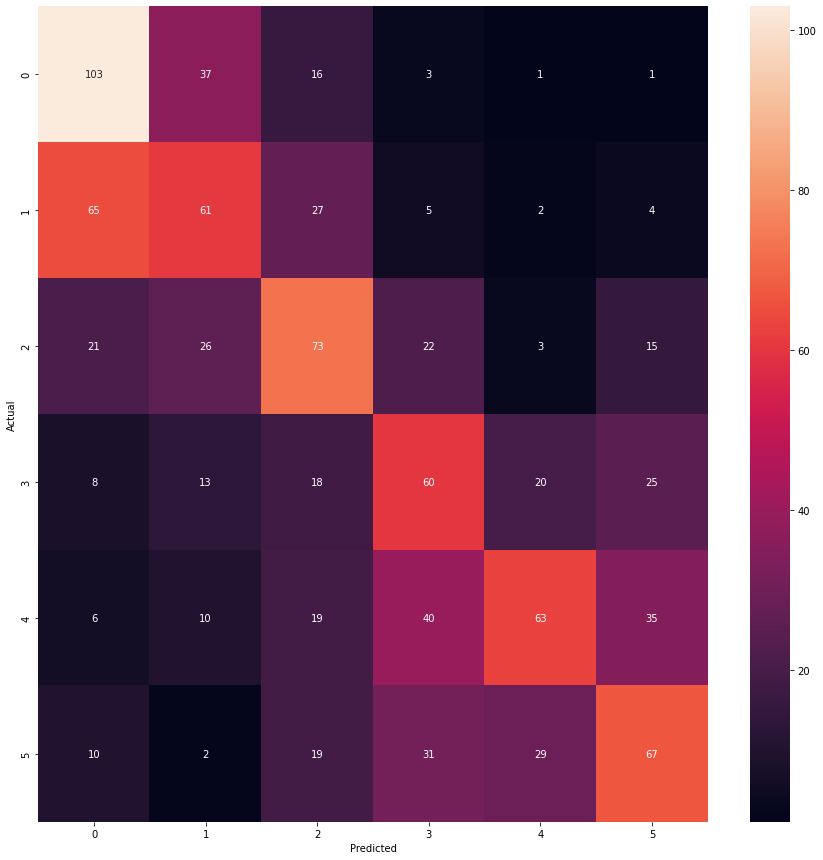

In [58]:
from gensim.models.doc2vec import TaggedDocument
import matplotlib.pyplot as plt
import seaborn as sns

sample_tagged = df.apply(lambda r: TaggedDocument(words=spacy_tokenizer(r['sentence']), tags=[r.difficulty]), axis=1)
#print(sample_tagged.head(20))
train_tagged, test_tagged = train_test_split(sample_tagged, test_size=0.2, random_state=0)

#to speed up
import multiprocessing
cores = multiprocessing.cpu_count()

from gensim.models import Doc2Vec

model_dbow = Doc2Vec(dm=0, vector_size=20, negative=6, hs=0, min_count=1, sample=0, workers=cores, epoch=300)
model_dbow.build_vocab([x for x in train_tagged.values])

model_dbow.train(train_tagged, total_examples=model_dbow.corpus_count, epochs=model_dbow.epochs)
# Select X and y
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=100)) for doc in sents])
    return targets, regressors

y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

X_train[:3]

# Fit model on training set - same algorithm as before
logreg = LogisticRegression(max_iter=1000, solver='lbfgs', C=10)
#logreg = MultinomialNB(alpha=1)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluate model
print(round(accuracy_score(y_test, y_pred), 4))
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### 4.7. Show a summary of your results

## Result for algorithms whithout data cleaning

In [ ]:
df = pd.DataFrame({"Logistic regression":[0.4762,0.4760,0.4732,0.4760],
                 "kNN":[0.4094,0.3667,0.3576,0.3667],"Decision Tree":[0.3098,0.3083,0.3054,0.3083],"Random Forest" : [0.4211,0.4156,0.4026,0.4156],
                 "Final method" : [0.5264,0.5260,0.5240,0.5260]})
df.index = ['Precision', 'Recall','F1 score', 'Accuracy']
df

,Logistic regression,kNN,Decision Tree,Random Forest,Final method
Precision,0.4762,0.4094,0.3098,0.4211,0.5264
Recall,0.4760,0.3667,0.3083,0.4156,0.5260
F1 score,0.4732,0.3576,0.3054,0.4026,0.5240
Accuracy,0.4760,0.3667,0.3083,0.4156,0.5260


##**Conclusion**

To conclude, Logisitc Regression was found to be the most efficient tools for this project. It was the classifier with the best performance among those tested without data cleaning. We can note that Naive Bays algorithms gives also a good accuracy.

The configs tests showed us that the n_gram range was what impacted the most the accuracy of the logistic regression, and show best performances for (1,8). The disadvantage of this method could be the calcul time which can be long.

The PCA method used to diminish the computing time impacted in a bad way too much the performance to keep it. 

The GridsearchCV function helped to determine the best hyperparameters in a faster way than the config tests and helped to improve a bit our final accuracy.